<a href="https://colab.research.google.com/github/shlee0619/workStats/blob/main/1128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 상관분석

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후에 런타임 재시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (41.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and direc

In [ ]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

## 상관계수

In [ ]:
# 라이브러리 불러오기
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = [2, 4, 5, 6, 4, 7, 8, 5, 6, 7]
y = [3, 2, 6, 5, 3, 6, 5, 4, 4, 5]

In [ ]:
# 평균
x_m = np.mean(x);y_m = np.mean(y)
print(x_m, y_m)

5.4 4.3


In [ ]:
# 편차
x_dev = x - x_m;y_dev = y - y_m
print(x_dev, y_dev)

[-3.4 -1.4 -0.4  0.6 -1.4  1.6  2.6 -0.4  0.6  1.6] [-1.3 -2.3  1.7  0.7 -1.3  1.7  0.7 -0.3 -0.3  0.7]


In [ ]:
# x편차와 y편차 곱
xy_dev = x_dev * y_dev;xy_dev

array([ 4.42,  3.22, -0.68,  0.42,  1.82,  2.72,  1.82,  0.12, -0.18,
        1.12])

In [ ]:
# 편차제곱
x_dev2 = x_dev ** 2;y_dev2 = y_dev ** 2
print(x_dev2, y_dev2)

[11.56  1.96  0.16  0.36  1.96  2.56  6.76  0.16  0.36  2.56] [1.69 5.29 2.89 0.49 1.69 2.89 0.49 0.09 0.09 0.49]


In [ ]:
# 상관계수
# 분자 = x편차와 y편차 곱의 합
sum(xy_dev)

14.799999999999997

In [ ]:
# 분모 = 제곱근(x편차제곱합*y편차제곱합)
np.sqrt(sum(x_dev2) * sum(y_dev2))

21.383170952877872

In [ ]:
# 분자/분모
rxy = sum(xy_dev) / np.sqrt(sum(x_dev2) * sum(y_dev2));rxy
# 해석	1) 방향: 양수이므로 양의 상관관계, 직접 상관관계
#       2) 강도: 0.6 ~ 0.8 이므로 강한 크기의 상관관계

0.6921330813196406

In [ ]:
# 함수로 상관계수 구하기
rxy = pearsonr(x, y)[0];rxy

0.6921330813196409

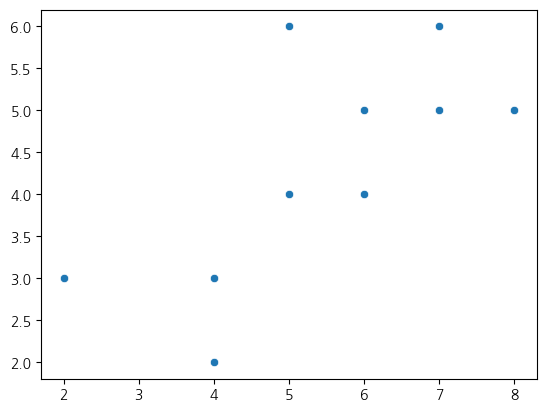

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()

## 상관행렬

In [ ]:
import pandas as pd

In [ ]:
# 데이터프레임으로 만들기
df = pd.DataFrame({'소득':[57327, 93767, 39410, 94951, 59090, 34628, 31809, 46232, 78707, 37816, 47085, 58394, 77072, 97746, 50302, 61129, 83154, 42798, 93530, 84912],
                   '교육':[10, 9, 8, 15, 15, 11, 13, 15, 16, 9, 8, 9, 13, 15, 14, 16, 16, 13, 9, 9],
                   '태도':[9, 5, 10, 6, 10, 9, 7, 7, 5, 7, 8, 9, 6, 1, 5, 5, 7, 2, 4, 4],
                   '투표':[3, 5, 3, 5, 3, 3, 1, 4, 4, 1, 1, 5, 5, 5, 5, 3, 4, 3, 4, 2]})

In [ ]:
df.head()

,소득,교육,태도,투표
0,57327,10,9,3
1,93767,9,5,5
2,39410,8,10,3
3,94951,15,6,5
4,59090,15,10,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   소득      20 non-null     int64
 1   교육      20 non-null     int64
 2   태도      20 non-null     int64
 3   투표      20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [ ]:
# 상관행렬
cor_mat = df.corr();cor_mat

,소득,교육,태도,투표
소득,1.000000,0.192372,-0.510758,0.598967
교육,0.192372,1.000000,-0.279387,0.346282
태도,-0.510758,-0.279387,1.000000,-0.267829
투표,0.598967,0.346282,-0.267829,1.000000


In [ ]:
cor_mat = round(cor_mat, 2);cor_mat

,소득,교육,태도,투표
소득,1.00,0.19,-0.51,0.60
교육,0.19,1.00,-0.28,0.35
태도,-0.51,-0.28,1.00,-0.27
투표,0.60,0.35,-0.27,1.00


In [ ]:
# 음수 기호 나오게 설정
plt.rc('axes', unicode_minus=False)

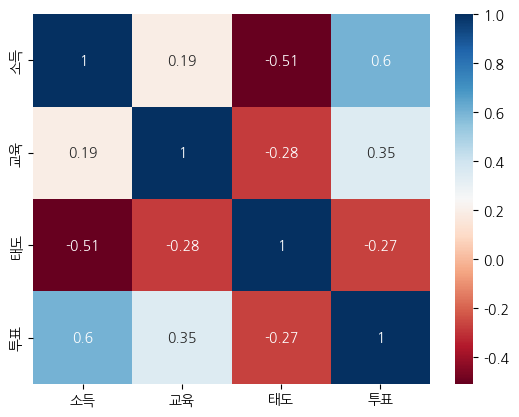

In [ ]:
# 시각화
sns.heatmap(cor_mat,
            cmap = 'RdBu',
            annot = True)
plt.show()

In [ ]:
# 꾸미기
# 상관행렬 차원 (4*4)에 맞게 0으로 채움
mask = np.zeros_like(cor_mat);mask

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# Return the indices for the upper-triangle of arr
# 대각선 기준 삼각형 윗부분을 1로 채움
# 대각선 기준으로 위 삼각형 자리에 1로 채움
mask[np.triu_indices_from(mask)] = 1;mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

In [ ]:
# 같은 변수를 행렬에서 제외 = 1행부터 끝 & 처음부터 맨 끝의 앞열까지
# 첫번째 행과 마지막 열 제외
mask_new = mask[1:,:-1];mask_new

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [ ]:
cor_mat_new = cor_mat.iloc[1:,:-1];cor_mat_new

,소득,교육,태도
교육,0.19,1.00,-0.28
태도,-0.51,-0.28,1.00
투표,0.60,0.35,-0.27


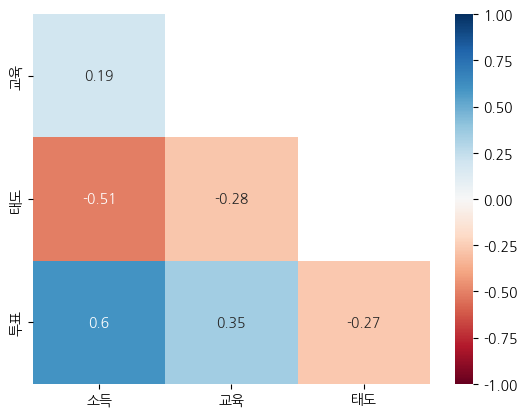

In [ ]:
# 시각화
sns.heatmap(cor_mat_new,
            cmap = 'RdBu',
            annot = True,
            mask = mask_new,
            vmax = 1,
            vmin = -1)
plt.show()

### 문제1

In [ ]:
# 문제1
# x = 맞은 문제 개수
# y = 시험에 대한 태도
x = [17, 13, 12, 15, 16, 14, 16, 16, 18, 19]
y = [94, 73, 59, 80, 93, 85, 66, 79, 77, 91]

In [ ]:
# 평균
x_m = np.mean(x);y_m = np.mean(y)
print(x_m, y_m)

15.6 79.7


In [ ]:
# 편차
x_dev = x - x_m;y_dev = y - y_m
print(x_dev, y_dev)

[ 1.4 -2.6 -3.6 -0.6  0.4 -1.6  0.4  0.4  2.4  3.4] [ 14.3  -6.7 -20.7   0.3  13.3   5.3 -13.7  -0.7  -2.7  11.3]


In [ ]:
# x편차와 y편차 곱
xy_dev = x_dev * y_dev;xy_dev

array([20.02, 17.42, 74.52, -0.18,  5.32, -8.48, -5.48, -0.28, -6.48,
       38.42])

In [ ]:
# 편차제곱
x_dev2 = x_dev ** 2;y_dev2 = y_dev ** 2
print(x_dev2, y_dev2)

[ 1.96  6.76 12.96  0.36  0.16  2.56  0.16  0.16  5.76 11.56] [2.0449e+02 4.4890e+01 4.2849e+02 9.0000e-02 1.7689e+02 2.8090e+01
 1.8769e+02 4.9000e-01 7.2900e+00 1.2769e+02]


In [ ]:
# 상관계수
# 분자 = x편차와 x편차 곱의 합
sum(xy_dev)

134.8

In [ ]:
# 분모 = 제곱근(x편차제곱합*y편차제곱합)
np.sqrt(sum(x_dev2) * sum(y_dev2))

226.1385416066885

In [ ]:
# 분자/분모
rxy = sum(xy_dev) / np.sqrt(sum(x_dev2) * sum(y_dev2));rxy
# 해석	1) 방향: 양의 값이므로 양의 상관관계, 직접 상관관계
#      	2) 크기: 0.4 ~ 0.6 이므로 중간 정도 크기의 상관관계

0.5960947613894625

In [ ]:
# 함수로 상관계수 구하기
rxy = pearsonr(x, y)[0];rxy

0.5960947613894625

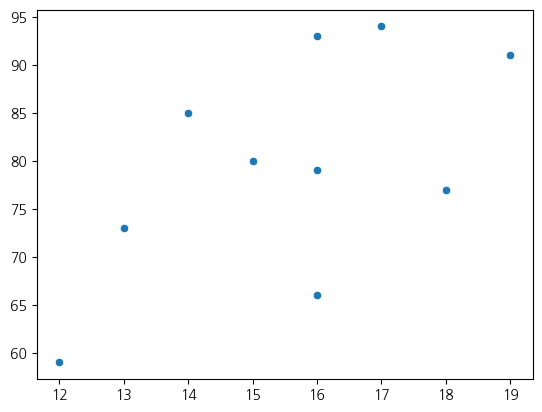

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()

## 상관계수에 대한 유의성 검정

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, t
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 상관계수 유의성 검정
# x: 결혼생활의 질
# y: 부모-자녀관계의 질
x = [76, 81, 78, 76, 76, 78, 76, 78, 98, 88, 76, 66, 44, 67, 65, 59, 87, 77, 79, 85, 68, 76, 77, 98, 99, 98, 87, 67, 78]
y = [43, 33, 23, 34, 31, 51, 56, 43, 44, 45, 32, 33, 28, 39, 31, 38, 21, 27, 43, 46, 41, 41, 48, 56, 55, 45, 68, 54, 33]

In [ ]:
# 상관계수
rxy = pearsonr(x, y)[0];rxy

0.3934186209743912

In [ ]:
# 결정계수
r2 = rxy ** 2;r2

0.15477821132939165

In [ ]:
# 표본크기
n = len(x);n

29

In [ ]:
# 자유도 = 표본의크기 - 2 (변수의 개수)
df = n - 2;df

27

In [ ]:
# 검정통계량
# 분자 = 표본상관계수-모상관계수(=0)
rxy

0.3934186209743912

In [ ]:
# 분모 = 제곱근((1-결정계수)/자유도)
np.sqrt((1 - r2)/df)

0.17693080763819516

In [ ]:
# 분자 / 분모
tv = rxy / np.sqrt((1 - r2)/df);tv

2.223573306571294

In [ ]:
# 임계값, 유의수준, 양측검정, 자유도
alpha = 0.05
cv = t.ppf(1 - alpha/2, df);cv

2.0518305164802833

In [ ]:
# 결론
cv < tv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 상관관계가 있다.
# 상관계수가 통계적으로 유의하다.

True

In [ ]:
# 유의확률
pv = (1 - t.cdf(tv, df)) * 2;pv

0.03473593132953301

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 상관관계가 있다.
# 상관계수가 통계적으로 유의하다.

True

In [ ]:
# 함수를 이용한 상관계수 유의성 검정
pearsonr(x, y)

PearsonRResult(statistic=0.3934186209743912, pvalue=0.03473593132953294)

In [ ]:
rxy, pv = pearsonr(x, y)
print("상관계수: ", rxy)
print("유의확률: ", pv)
# 결혼생활의 질이 높으면 부모-자녀관계의 질이 높다
# 결혼생활의 질이 낮으면 부모-자녀관계의 질이 낮다
# 이 상관관계는 같은 방향을 가지고 있다.
# 또한 약한 크기의 상관관계
# 이 상관관계는 통계적으로 유의하다.

상관계수:  0.3934186209743912
유의확률:  0.03473593132953294


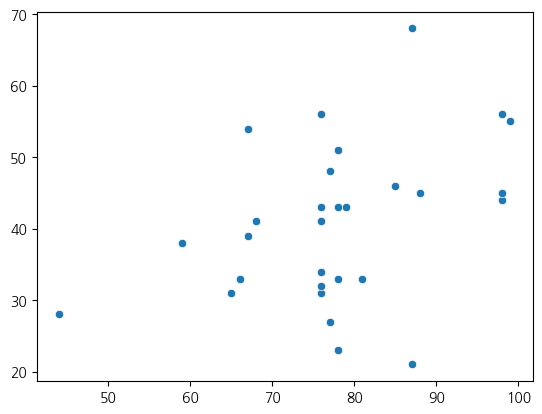

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()

### 문제3

In [ ]:
# 문제3
# x: 동기부여
# y: 평균성적(GPA)
x = [1, 6, 2, 7, 5, 4, 3, 1, 8, 6, 5, 6, 5, 5, 6, 6, 7, 7, 2, 9, 8, 8, 7, 6, 9, 7, 8, 7, 8, 9]
y = [3.4, 3.4, 2.5, 3.1, 2.8, 2.6, 2.1, 1.6, 3.1, 2.6, 3.2, 3.1, 3.2, 2.7, 2.8, 2.6, 2.5, 2.8, 1.8, 3.7, 3.1, 2.5, 2.4, 2.1, 4, 3.9, 3.1, 3.3, 3, 2]

In [ ]:
# 상관계수
rxy = pearsonr(x, y)[0];rxy

0.43402264347318786

In [ ]:
# 결정계수
r2 = rxy ** 2;r2

0.18837565504745393

In [ ]:
# 표본크기
n = len(x);n

30

In [ ]:
# 자유도 = 표본의크기 - 2 (변수의 개수)
df = n - 2;df

28

In [ ]:
# 검정통계량
# 분자 = 표본상관계수-모상관계수(=0)
rxy

0.43402264347318786

In [ ]:
# 분모 = 제곱근((1-결정계수)/자유도)
np.sqrt((1 - r2)/df)

0.1702544676309706

In [ ]:
# 분자 / 분모
tv = rxy / np.sqrt((1 - r2)/df);tv

2.549258468881646

In [ ]:
# 임계값, 유의수준, 양측검정, 자유도
alpha = 0.05
cv = t.ppf(1 - alpha/2, df);cv

2.048407141795244

In [ ]:
# 결론
cv < tv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 상관관계가 있다.
# 상관계수가 통계적으로 유의하다.

True

In [ ]:
# 유의확률
pv = (1 - t.cdf(tv, df)) * 2;pv

0.01655923778766555

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 상관관계가 있다.
# 상관계수가 통계적으로 유의하다.

True

In [ ]:
# 함수를 이용한 상관계수 유의성 검정
pearsonr(x, y)

PearsonRResult(statistic=0.43402264347318786, pvalue=0.016559237787665684)

In [ ]:
rxy, pv = pearsonr(x, y)
print("상관계수: ", rxy)
print("유의확률: ", pv)
# 동기부여가 높으면 평균 성적이 높다
# 동기부여가 낮으면 평균 성적이 낮다
# 이 상관관계는 같은 방향을 가지고 있다.
# 또한 중간 정도 크기의 상관관계
# 이 상관관계는 통계적으로 유의하다.

상관계수:  0.43402264347318786
유의확률:  0.016559237787665684


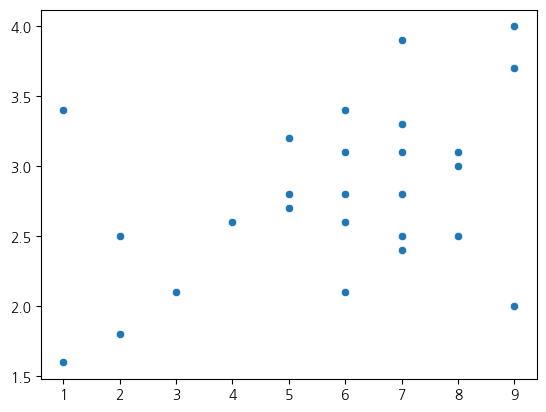

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()

# 선형회귀분석

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t

In [ ]:
# x: 고등학교 평균 점수
# y: 대학교 1학년 평균 학점
x = [3.5, 2.5, 4, 3.8, 2.8, 1.9, 3.2, 3.7, 2.7, 3.3]
y = [3.3, 2.2, 3.5, 2.7, 3.5, 2, 3.1, 3.4, 1.9, 3.7]

In [ ]:
# 평균
x_m = np.mean(x);y_m = np.mean(y)
print(x_m, y_m)

3.1399999999999997 2.9299999999999997


In [ ]:
# 편차
x_d = x - x_m;y_d = y - y_m
print(x_d, y_d)

[ 0.36 -0.64  0.86  0.66 -0.34 -1.24  0.06  0.56 -0.44  0.16] [ 0.37 -0.73  0.57 -0.23  0.57 -0.93  0.17  0.47 -1.03  0.77]


In [ ]:
# x편차*y편차
xy_d = x_d * y_d;xy_d

array([ 0.1332,  0.4672,  0.4902, -0.1518, -0.1938,  1.1532,  0.0102,
        0.2632,  0.4532,  0.1232])

In [ ]:
# x편차제곱
x_d2 = x_d ** 2;x_d2

array([0.1296, 0.4096, 0.7396, 0.4356, 0.1156, 1.5376, 0.0036, 0.3136,
       0.1936, 0.0256])

In [ ]:
# 기울기 = 공분산/x분산
# 분자 = x편차*y편차의합
sum(xy_d)

2.7479999999999998

In [ ]:
# 분모 = x편차제곱합
sum(x_d2)

3.904

In [ ]:
# 분자/분모
slope = sum(xy_d)/sum(x_d2);slope

0.7038934426229507

In [ ]:
# 절편 = y평균 - 기울기*x평균
intercept = y_m - slope * x_m;intercept

0.7197745901639347

In [ ]:
# 예측값
y_hat = intercept + slope * pd.Series(x);y_hat

,0
0,3.183402
1,2.479508
2,3.535348
3,3.394570
4,2.690676
5,2.057172
6,2.972234
7,3.324180
8,2.620287
9,3.042623


In [ ]:
# 예측 오차 = y 관측치 - y 예측값
y_hat_d = y - y_hat;y_hat_d

,0
0,0.116598
1,-0.279508
2,-0.035348
3,-0.694570
4,0.809324
5,-0.057172
6,0.127766
7,0.075820
8,-0.720287
9,0.657377


In [ ]:
# 예측 오차 제곱
y_hat_d2 = y_hat_d ** 2;y_hat_d2

,0
0,0.013595
1,0.078125
2,0.001250
3,0.482427
4,0.655005
5,0.003269
6,0.016324
7,0.005749
8,0.518813
9,0.432145


In [ ]:
# 자유도 = n - k -1
# k = 독립변수의 개수
k = 1
n = len(x)
df = n - k - 1;df

8

In [ ]:
# 검정통계량 = 기울기/표준오차
slope
# 표준오차 = 제곱근(예측 오차 제곱합/자유도/ x편차제곱합)
# 분자 = 예측 오차 제곱합/자유도
sum(y_hat_d2)/df

0.27583760245901634

In [ ]:
# 분모 = x편차제곱합
sum(x_d2)

3.904

In [ ]:
# 제곱근(분자/분모)
np.sqrt((sum(y_hat_d2)/df)/sum(x_d2))

0.26581031503816904

In [ ]:
# 검정통계량
tv = slope/np.sqrt((sum(y_hat_d2)/df)/sum(x_d2));tv

2.6481043165005658

In [ ]:
# 임계값, 유의수준, 양측검정, 자유도
alpha = 0.05
cv = t.ppf(1 - alpha/2, df);cv

2.306004135204166

In [ ]:
# 결론
cv < tv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 회귀계수가  0 이 아니다 = 회귀계수가 통계적으로 유의하다

True

In [ ]:
# 유의확률
pv = (1 - t.cdf(tv, df))*2;pv

0.02934197812656203

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 회귀계수가  0 이 아니다 = 회귀계수가 통계적으로 유의하다

True

# 결정계수

In [ ]:
# 결정계수 = SSR/SST(=SSR+SSE)
# SSE = 오차제곱합
sse = sum(y_hat_d2);sse
# SSR = 회귀제곱합
# 회귀 편차 = y 예측값 - y 평균값 = y_hat - y_m
r_d = y_hat - y_m;r_d

,0
0,0.253402
1,-0.450492
2,0.605348
3,0.464570
4,-0.239324
5,-0.872828
6,0.042234
7,0.394180
8,-0.309713
9,0.112623


In [ ]:
# 회귀 편차 제곱
r_d2 = r_d**2;r_d2

,0
0,0.064212
1,0.202943
2,0.366447
3,0.215825
4,0.057276
5,0.761828
6,0.001784
7,0.155378
8,0.095922
9,0.012684


In [ ]:
# # 회귀 편차 제곱합 SSR
ssr = sum(r_d2);ssr

1.9342991803278686

In [ ]:
# 결정계수
r2 = ssr/(ssr+sse);r2
# x 변수의 분산이 y 변수의 분산에 대해서 46% 설명 가능하다.
#

0.4671091959255902

In [ ]:
# 오차 = 관측치-예측값
# 오차 분산 = 오차 제곱 평균 = 오차제곱합 SSE/자유도
# 표준오차 = 제곱근(오차제곱합 SSE/자유도)
np.sqrt(sse/df)
#

0.5252024395021565

# 회귀모형을 함수로 만들기

In [ ]:
# 참고: 회귀모형으로 유의확률 추출
import statsmodels.formula.api as smf
#
df = pd.DataFrame({'x': x,
                   'y': y})
#
model = smf.ols('y ~ x', df)
result = model.fit()
print(result.summary())
# R-squared 결정계수 = 설명력
# Adj. R-squared 조정결정계수 = 독립변수의 개수가 다른 모델끼리 비교할 때 사용
# F 검정 결과 = 회귀모델 유의성 검정
# AIC 모델 적합성 비교할 때 사용
# Intercept 0.7198  절편 - 유의하지 않음
# Cost  0.7039 기울기 - 유의함
# Durbin-Watson 2에 가까울수록 오차항이 독립

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     7.012
Date:                Thu, 28 Nov 2024   Prob (F-statistic):             0.0293
Time:                        06:37:29   Log-Likelihood:                -6.6340
No. Observations:                  10   AIC:                             17.27
Df Residuals:                       8   BIC:                             17.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7198      0.851      0.846      0.4

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


## 문제1

In [ ]:
# 문제1
# x: 추측 횟수
# y: 응답 시간
x = pd.Series([5, 7, 6, 2, 4, 3, 12, 5, 4, 3])
y = pd.Series([14.5, 13.4, 12.7, 16.4, 21.0, 13.9, 17.3, 12.5, 16.7, 22.7])

In [ ]:
# 평균 & 편차
x_m = np.mean(x);y_m = np.mean(y);x_m;y_m
x_d = x - x_m;y_d = y - y_m;x_d;y_d

,0
0,-1.61
1,-2.71
2,-3.41
3,0.29
4,4.89
5,-2.21
6,1.19
7,-3.61
8,0.59
9,6.59


In [ ]:
# 기울기 = x_d*y_d 합/x_d^2 합
# 분자
xy_d = x_d*y_d;xy_d
sum(xy_d)

-15.609999999999989

In [ ]:
# 분모
x_d2 = x_d**2;x_d2
sum(x_d2)

72.9

In [ ]:
# 분자/분모
b = sum(xy_d)/sum(x_d2);b

-0.21412894375857322

In [ ]:
# 절편 = y_m - b*x_m
a = y_m - b*x_m;a
# 1) 회귀방정식: a + b*x
#

17.202057613168723

In [ ]:
# 2) x = 8 일 때, y 예측값
a + b*8

15.489026063100138

In [ ]:
# 회귀계수=기울기 유의성 검정
# 검정통계량 = 기울기/표준오차
# 분자
b

-0.21412894375857322

In [ ]:
# 분모 = 표준오차 = 제곱근(y hat_d^2 합/자유도/x_d^2 합)
y_hat = a + b*x;y_hat
y_hat_d = y - y_hat;y_hat_d
y_hat_d2 = y_hat_d**2;y_hat_d2
# y hat_d^2 합
sum(y_hat_d2)

105.32644718792864

In [ ]:
# 자유도 = n - k - 1
n = len(x);n;k = 1;df = n-k-1;df

8

In [ ]:
# 표준오차
se = np.sqrt(sum(y_hat_d2)/df/sum(x_d2));se

0.4249716507690291

In [ ]:
# 분자/분모
tv = b/se;tv = abs(tv);tv

0.5038664187860185

In [ ]:
# 임계값 & 유의수준 & 자유도 & 양측검정
alpha = 0.05;df
cv = t.ppf(1 - alpha/2, df);cv

2.306004135204166

In [ ]:
# 결론
cv < tv
# 임계값보다 검정통계량이 작다
# 왼쪽
# 채택역
# 통계적으로 유의하지 않다
#

False

In [ ]:
# 유의확률
pv = 1 - t.cdf(tv, df);pv = pv*2;pv
#

0.6279352264764086

In [ ]:
# 결론
alpha > pv
# 유의수준보다 유의확률이 크다
# 왼쪽
# 채택역
# 통계적으로 유의하지 않다
#

False

In [ ]:
# 결정계수 = SSR/SST(=SSR+SSE)
# SSE = 오차제곱합
sse = sum(y_hat_d2);sse

105.32644718792864

In [ ]:
# SSR = 회귀제곱합
# 회귀 편차 = y_hat - y_m
r_d = y_hat - y_m;r_d
r_d2 = r_d**2;r_d2
ssr = sum(r_d2);ssr

3.342552812071324

In [ ]:
# 결정계수
r2 = ssr/(ssr+sse);r2
# x 변수가 y 변수에 대해서 3% 설명 가능하다.
#

0.030759027984718045

In [ ]:
# 3) 표준 오차 = 표준 예측 오차
# 오차 = 관측치-예측값
# 오차 분산 = 오차 제곱 평균 = 오차제곱합/자유도
# 표준오차 = 제곱근(오차제곱합/자유도)
np.sqrt(sse/df)
#

3.6284715650658033

In [ ]:
# 문제1
# x: 추측 횟수
# y: 응답 시간
df = pd.DataFrame({'x': [5, 7, 6, 2, 4, 3, 12, 5, 4, 3],
                   'y': [14.5, 13.4, 12.7, 16.4, 21.0, 13.9, 17.3, 12.5, 16.7, 22.7]})

In [ ]:
# 회귀모형
import statsmodels.formula.api as smf
sr = smf.ols('y ~ x', df)
result = sr.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.090
Method:                 Least Squares   F-statistic:                    0.2539
Date:                Thu, 28 Nov 2024   Prob (F-statistic):              0.628
Time:                        07:17:11   Log-Likelihood:                -25.962
No. Observations:                  10   AIC:                             55.92
Df Residuals:                       8   BIC:                             56.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2021      2.452      7.015      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


# 카이제곱검정

## 독립성검정

In [ ]:
# 성별, 투표참여여부
# row = 투표참여여부(투표참여, 투표불참)
# col = 성별(남성, 여성)
tab = pd.DataFrame({'male': [37, 20],
                    'female': [32, 31]},
                   index = ['yes', 'no'])
tab

,male,female
yes,37,32
no,20,31


In [ ]:
# 행 합계
tab.sum(axis = 1)

,0
yes,69
no,51


In [ ]:
# R1, R2
r1 = tab.sum(axis = 1)[0]
r2 = tab.sum(axis = 1)[1]
print(r1, r2)
# r1, r2 = tab.sum(axis = 1)
# print(r1, r2)

69 51


<ipython-input-119-863029ca844b>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r1 = tab.sum(axis = 1)[0]
<ipython-input-119-863029ca844b>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r2 = tab.sum(axis = 1)[1]


In [ ]:
# 열 합계
tab.sum()

,0
male,57
female,63


In [ ]:
# C1, C2
c1 = tab.sum()[0]
c2 = tab.sum()[1]
print(c1, c2)
# c1, c2 = tab.sum(axis = 0)
# print(c1, c2)

57 63


<ipython-input-121-234fd9e4090a>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c1 = tab.sum()[0]
<ipython-input-121-234fd9e4090a>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c2 = tab.sum()[1]


In [ ]:
# 전체 빈도
total = sum([c1, c2]);total
# total = sum(tab.sum());total

120

In [ ]:
# 기대빈도
e11 = (r1*c1)/total
e12 = (r1*c2)/total
e21 = (r2*c1)/total
e22 = (r2*c2)/total
print(e11, e12, e21, e22)

32.775 36.225 24.225 26.775


In [ ]:
# 행 합계
tab_r = pd.Series([r1, r2]);print(tab_r)
# 열 합계
tab_c = pd.Series([c1, c2]);print(tab_c)

0    69
1    51
dtype: int64
0    57
1    63
dtype: int64


In [ ]:
# 기대빈도
tab_rc = []
for i in tab_r:
  for j in tab_c:
    k = i * j
    tab_rc.append(k)
# R * C
tab_rc = pd.Series(tab_rc)
print(tab_rc)
# E = R*C / total
tab_e = tab_rc / total
print(tab_e)

0    3933
1    4347
2    2907
3    3213
dtype: int64
0    32.775
1    36.225
2    24.225
3    26.775
dtype: float64


In [ ]:
# 검정통계량
x2v = \
(tab.iloc[0,0] - e11)**2 / e11 + \
(tab.iloc[0,1] - e12)**2 / e12 + \
(tab.iloc[1,0] - e21)**2 / e21 + \
(tab.iloc[1,1] - e22)**2 / e22
x2v

2.440970285902311

In [ ]:
# 검정통계량
of = pd.Series([37, 32, 20, 31]);print(of)
x2v = sum((of - tab_e)**2/tab_e);x2v

0    37
1    32
2    20
3    31
dtype: int64


2.440970285902311

In [ ]:
# 임계값, 유의수준, 자유도, 우측검정
alpha = 0.05
df = (len(tab.index) - 1) * (len(tab.columns) - 1);df

1

In [ ]:
# 임계값
from scipy.stats import chi2
cv = chi2.ppf(1 - alpha, df);cv

3.841458820694124

In [ ]:
# 결론
cv < x2v
# 왼쪽 = 채택역 = 귀무가설 채택 = 대립가설 기각 = 차이가 없다
# 성별과 투표참여여부는 독립이다 = 연관이 없다 = 통계적으로 유의하지 않다

False

In [ ]:
# 유의확률
pv = 1 - chi2.cdf(x2v, df);pv

0.11820309038082188

In [ ]:
# 결론
alpha > pv
# 왼쪽 = 채택역 = 귀무가설 채택 = 대립가설 기각 = 차이가 없다
# 성별과 투표참여여부는 독립이다 = 연관이 없다 = 통계적으로 유의하지 않다

False

In [ ]:
# 함수 이용한 검정
from scipy.stats import chi2_contingency
# 기본값 correction = True => Yate's correction
# Yates' continuity correction: 2개의 그룹을 가진 변수들만 사용 가능
# 피어슨 카이제곱은 충분한 표본 수가 확보되었다는 전제하에 시행
# 표본의 수가 적을 때는 오차가 발생할 수 있으며, 이를 보정한 것이 Yates' continuity correct
# 적용하면 검정통계량이 더 낮게 나옴

# correction = False => Yate's correction 적용하지 않음
chi2_contingency(tab, correction = False)
# 샘플이 충분하지 않을 때 Yate's correction 적용함

Chi2ContingencyResult(statistic=2.440970285902311, pvalue=0.11820309038082191, dof=1, expected_freq=array([[32.775, 36.225],
       [24.225, 26.775]]))

In [ ]:
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
stats = importr('stats')

In [ ]:
tab = np.array(tab)
stats.fisher_test(tab)